In [3]:
import numpy as np 
import pandas as pd
import os
import tensorflow as tf

In [4]:
import cv2
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn as sns

In [5]:
datapath = 'D:/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    datapath + 'train/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    datapath + 'valid/', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    datapath + 'test/', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [5]:
def plot_img(path, set_):
    dir_ = os.path.join(path, 'train', set_)
    k = np.random.randint(20000)
    fig, ax = plt.subplots(3,3, figsize=(8,8))
    for j in range(3):
        for i in range(3):
            img = load_img(os.path.join(dir_, os.listdir(os.path.join(dir_))[k]))          
            ax[j,i].imshow(img)
            ax[j,i].set_title("")
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    plt.suptitle(set_ + ' faces from train dataset')
    return plt

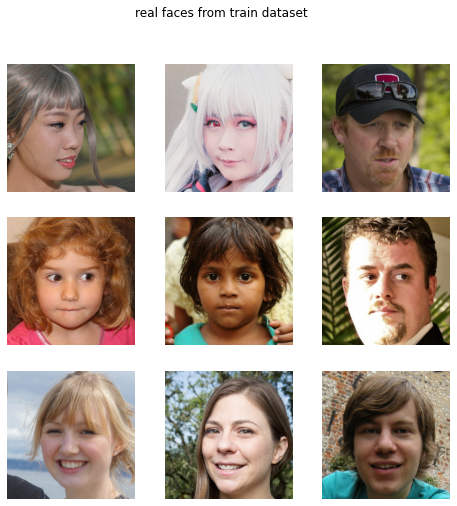

In [7]:
plot_img(datapath, 'real').show()

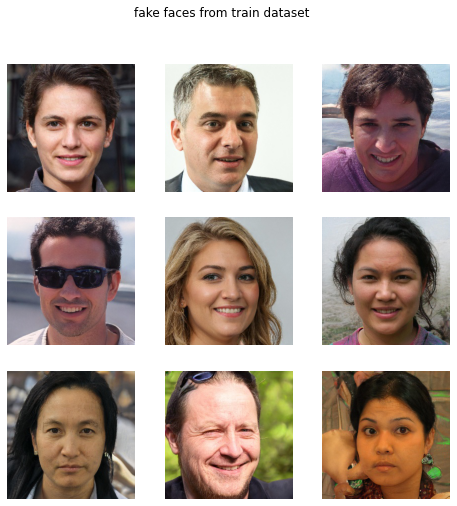

In [8]:
plot_img(datapath, 'fake').show()

In [6]:
input_shape = (224,224,3)
epsilon=0.001

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=1024, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 32)        1

In [10]:
from keras.optimizers import Adam
opt = Adam(lr=0.0001, decay=1e-6)
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

In [6]:
#model = tf.keras.models.load_model('saved-final-model-1.h5')

In [12]:
from keras.callbacks import ModelCheckpoint
filepath = "saved-final-model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
train_steps = 80000//64
valid_steps = 5000//64

history = model.fit_generator(
    train_flow,
    epochs =4,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

D:\anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/4
1250/1250 [==============================] - 5911s 5s/step - loss: 0.0394 - accuracy: 0.9854 - val_loss: 0.1119 - val_accuracy: 0.9591

Epoch 00001: val_accuracy improved from -inf to 0.95913, saving model to saved-final-model.h5
Epoch 2/4
1250/1250 [==============================] - 5106s 4s/step - loss: 0.0315 - accuracy: 0.9881 - val_loss: 0.1262 - val_accuracy: 0.9559

Epoch 00002: val_accuracy did not improve from 0.95913
Epoch 3/4
1250/1250 [==============================] - 5155s 4s/step - loss: 0.0325 - accuracy: 0.9881 - val_loss: 0.1273 - val_accuracy: 0.9573

Epoch 00003: val_accuracy did not improve from 0.95913
Epoch 4/4
1250/1250 [==============================] - 5451s 4s/step - loss: 0.0283 - accuracy: 0.9897 - val_loss: 0.1092 - val_accuracy: 0.9627

Epoch 00004: val_accuracy improved from 0.95913 to 0.96274, saving model to saved-final-model.h5


In [18]:
history = model.fit_generator(
    train_flow,
    epochs =2,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/2
1250/1250 [==============================] - 5391s 4s/step - loss: 0.0268 - accuracy: 0.9901 - val_loss: 0.0703 - val_accuracy: 0.9746

Epoch 00001: val_accuracy improved from 0.96274 to 0.97456, saving model to saved-final-model.h5
Epoch 2/2
1250/1250 [==============================] - 5692s 5s/step - loss: 0.0246 - accuracy: 0.9908 - val_loss: 0.0620 - val_accuracy: 0.9802

Epoch 00002: val_accuracy improved from 0.97456 to 0.98017, saving model to saved-final-model.h5


In [19]:
model.save("saved-final-model-1.h5")

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

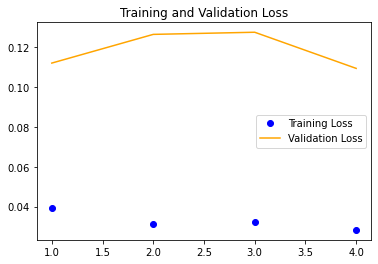

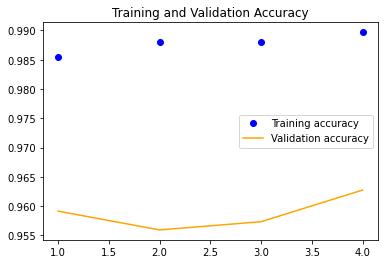

In [17]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [7]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

Accuracy Score : 0.97765
Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     10000
           1       0.98      0.97      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



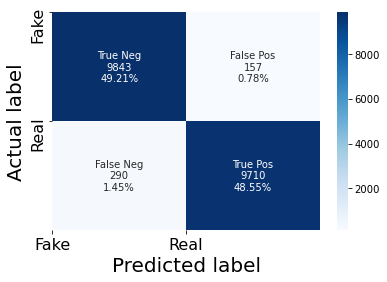

In [12]:
results = confusion_matrix(y_test, y_pred > 0.5) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues')
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [13]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.9977717550000001
AP Score: 0.9976468037385783


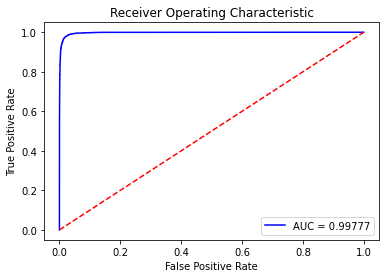

In [21]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Predicted by the model as FAKE, actually is FAKE')

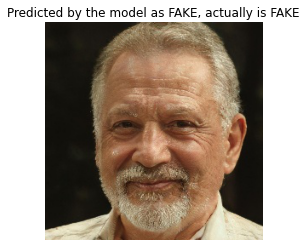

In [35]:
i = np.random.randint(20000)
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [36]:
def predict_img_class():
    k = np.random.randint(20000)
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx,gridy, figsize=(14,14))
    for j in range(gridx):
        for i in range(gridy):
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
            if model.predict(test_flow[k][0])[0][0]<0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
            datasetpath = test_flow.filenames[k]
            imgpath = datapath+'test/'+datasetpath
            img = load_img(imgpath)          
            ax[j,i].imshow(img)
            ax[j,i].set_title(f"Predicted: {prediction}, Actual: {actual}",size = 12)
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    fig.suptitle('Testing the prediction on Test images', size = 20)
    return plt

<module 'matplotlib.pyplot' from 'D:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

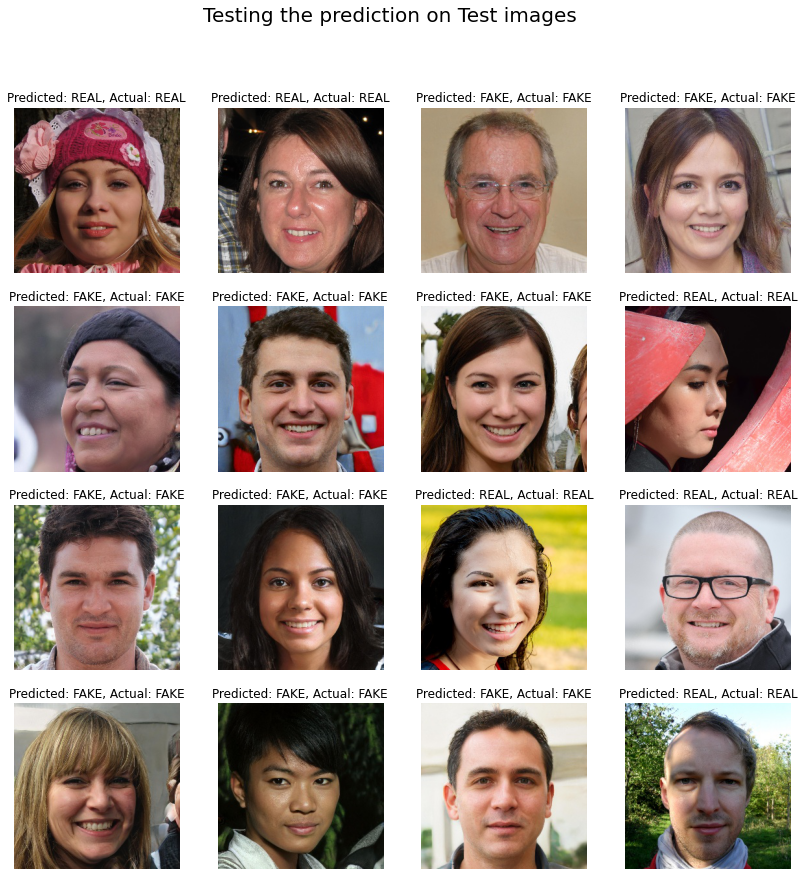

In [37]:
predict_img_class()